# Amazon Alexa Review - Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
#importing the data to colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Amazon Product Sentiment Analysis/amazon_alexa.tsv',
                 delimiter='\t',
                 quoting = 3)

In [ ]:
#checking the shape of the dataset


def shape(df):
  return f'This Dataset contains {df.shape[0]} rows and {df.shape[1]} columns'

In [ ]:
shape(df)

'This Dataset contains 3150 rows and 5 columns'

In [ ]:
#checking the percentage of null values present in the dataset


def percentage_of_null_values(df):
  percentage_of_nulls = (df.isnull().sum()/df.shape[0]*100).round(3)
  result_data = pd.DataFrame({'column_names':percentage_of_nulls.index,
                              'Percentage_Of_Nulls':percentage_of_nulls.values}).reset_index(drop=True)
  return result_data

In [ ]:
percentage_of_null_values(df)

,column_names,Percentage_Of_Nulls
0,rating,0.000
1,date,0.000
2,variation,0.000
3,verified_reviews,0.032
4,feedback,0.000


In [ ]:
#checking the data types of the columns present in the dataset


def columndatatypes(df):
  return pd.DataFrame({'Column_Names': df.columns,
                      'DataType_of_Column':df.dtypes.values}).reset_index(drop=True)

In [ ]:
columndatatypes(df)

,Column_Names,DataType_of_Column
0,rating,int64
1,date,object
2,variation,object
3,verified_reviews,object
4,feedback,int64


In [ ]:
#checking for the null values

df[df['verified_reviews'].isnull()] # as we have only 1 null value present in the dataset,dropping the null values

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
df.dropna(inplace=True) #dropping the null permanently

In [ ]:
percentage_of_null_values(df) #post dropping the null value from the dataset

,column_names,Percentage_Of_Nulls
0,rating,0.0
1,date,0.0
2,variation,0.0
3,verified_reviews,0.0
4,feedback,0.0


In [ ]:
shape(df) #earlier we have 3150 values including null, post null value drop we have 3149 rows

'This Dataset contains 3149 rows and 5 columns'

In [ ]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

df['length_of_verified_reviews'] = df['verified_reviews'].apply(len)


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length_of_verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
#Randomly checking for the 10th record to check the length is working or not

print(f'''
'verified_reviews' column value: {df.iloc[10]['verified_reviews']}

'len of the 'verified_reviews' column value' : {len(df.iloc[10]['verified_reviews'])}

'len of length column value': {df.iloc[10]['length_of_verified_reviews']}
''')


'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."

'len of the 'verified_reviews' column value' : 65

'len of length column value': 65



##                                    Analyzing 'rating' column



In [ ]:
print(f"Rating value count: {df['rating'].value_counts()}")

Rating value count: rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Upon reviewing the 'rating' column
1. we have highest rating as 5 star with 2286 ratings
2. we have second highest rating as 4 star with 455 ratings
3. we have third highest rating as 3 star with 152 ratings
4. The least ratings are 1 & 2 with total 256 ratings

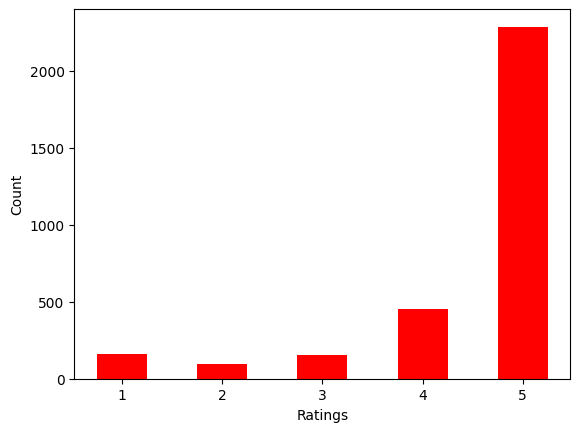

In [ ]:
value_counts = df['rating'].value_counts()
plt.bar(value_counts.index,value_counts.values,color='red',width=0.5)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the percentage distribution of rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage of distribution : {round(df['rating'].value_counts(normalize=True)*100,2)}")

Rating value count - percentage of distribution : rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: proportion, dtype: float64


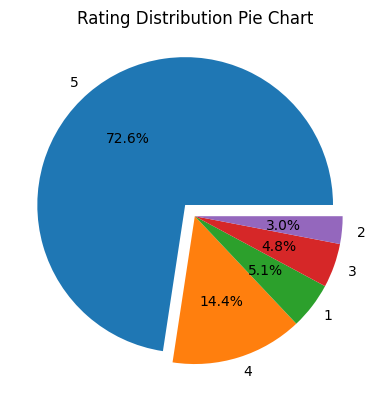

In [ ]:
explode = [0.1 if i == value_counts.max() else 0 for i in value_counts]
plt.pie(x=value_counts,labels=value_counts.index,
        autopct='%1.1f%%',explode=explode)
plt.title('Rating Distribution Pie Chart')
plt.show()

##    Analyzing 'FeedBack' Column

In [ ]:
#checking the counts of distinct values

df['feedback'].value_counts()

,count
feedback,
1,2893
0,256


upon reviewing the 'feedback' column with 3149 values
1. we have found 2893 values of 1 meaning positive feedback
2. we have founf 256 values of 0 meaning negative feedback

As per data we found that people with 1 and 2 ratings leaded to 0 feedback.

In [ ]:
# printing one record of negative feedback

review_0 = df[df['feedback']==0].iloc[12]['verified_reviews']
print(review_0)

I returned 2 Echo Dots & am only getting refund for 1. I returned 2 in one package. I want my refunds for both of them. They are in the same package. Can you not see them both???!!!


In [ ]:
# printing one record of positive feedback

review_1 = df[df['feedback']==1].iloc[12]['verified_reviews']
print(review_1)

"I purchased this for my mother who is having knee problems now, to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do...Alexa play this song, What time is it and where, and how to cook this and that!"


In [ ]:
# Feedback = 0
df[df['feedback']==0]['rating'].value_counts()

,count
rating,
1,161
2,95


In [ ]:
# Feedback = 1
df[df['feedback']==1]['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


##From the above 2 we got know
1. '0' means negative feedback
2. '1' means positive feedback

###Lets plot the feedback value count in a bar graph





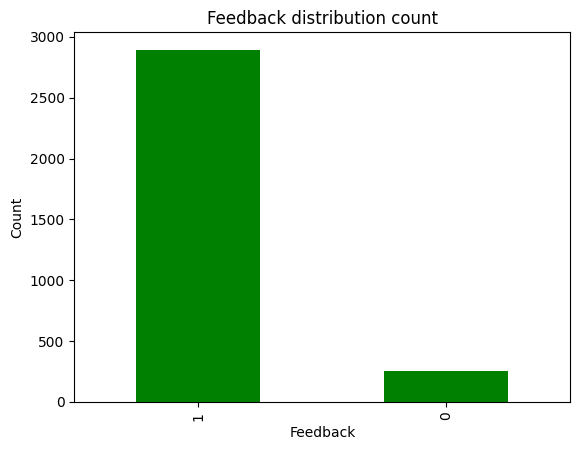

In [ ]:
df['feedback'].value_counts().plot.bar(color='green')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the percentage distribution of feedback - we'll divide the number of records for each feedback by total number of records

print(f"Rating value count - percentage of distribution : {round(df['feedback'].value_counts(normalize=True)*100,2)}")

Rating value count - percentage of distribution : feedback
1    91.87
0     8.13
Name: proportion, dtype: float64


 we have total 8.13 negative feedbacks and 91.87 positive feedbacks


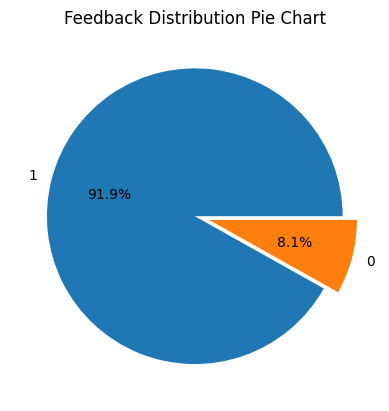

In [ ]:
value_counts = round(df['feedback'].value_counts(normalize=True)*100,2)
print(f" we have total {value_counts[0]} negative feedbacks and {value_counts[1]} positive feedbacks")
explode = [0.1 if i == value_counts.min() else 0 for i in value_counts]
plt.pie(x=value_counts,labels=value_counts.index,
        autopct='%1.1f%%',explode = explode)
plt.title('Feedback Distribution Pie Chart')
plt.show()

##Analyzing 'variation' column

In [ ]:
# This column refers to the variation or type of Amazon Alexa Product. Example- Black Dot, Charcol Fabric etc.

print(f"Variation value count: {df['variation'].value_counts()}")

Variation value count: variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


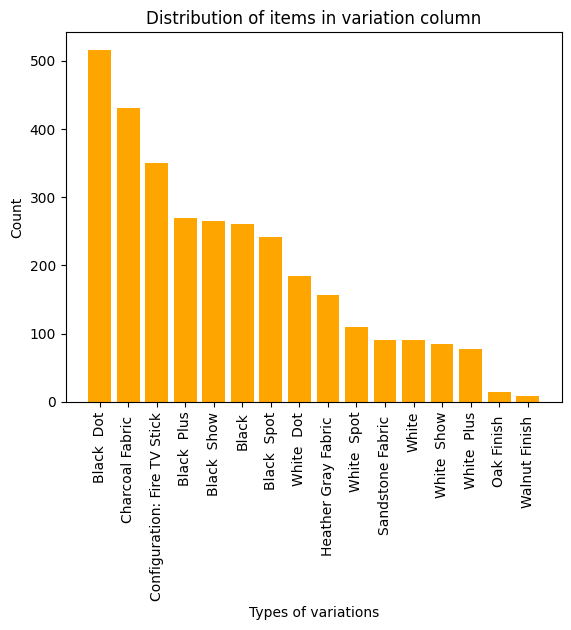

In [ ]:
value_counts = df['variation'].value_counts()

plt.bar(value_counts.index,value_counts.values,color='orange')
plt.xlabel('Types of variations')
plt.ylabel('Count')
plt.title('Distribution of items in variation column')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Finding the percentage distribution of each variation

print(f"variation value count - percentage distribution {df['variation'].value_counts(normalize=True)*100}")

variation value count - percentage distribution variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: proportion, dtype: float64


##Mean rating according to variation

In [ ]:
df.groupby(by='variation')['rating'].mean()


,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


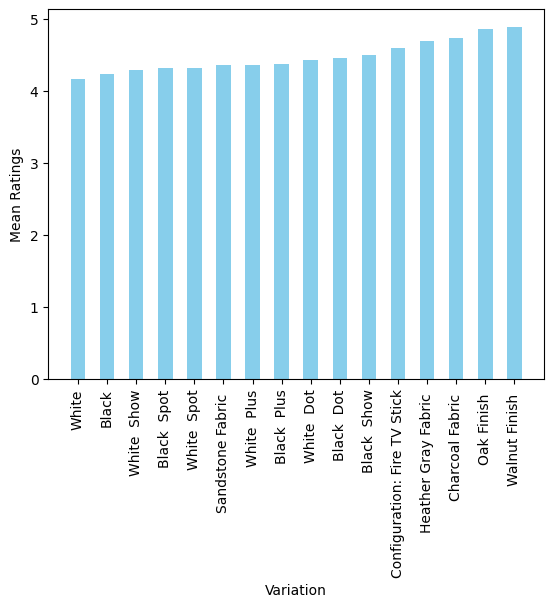

In [ ]:
#plotting the above data
mean_ratings = df.groupby(by='variation')['rating'].mean().sort_values()

plt.bar(mean_ratings.index,mean_ratings.values,color='skyblue',width=0.5)
plt.xlabel('Variation')
plt.ylabel('Mean Ratings')
plt.xticks(rotation=90)
plt.show()

1. Upon review found the product 'walnut finish' has the highest average rating
2. Conversly the product 'White' has low average rating

## Analyzing "verified_reviews" column
This column contains text data hence using its length for analysis

In [ ]:
df['length_of_verified_reviews'].describe()

,length_of_verified_reviews
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


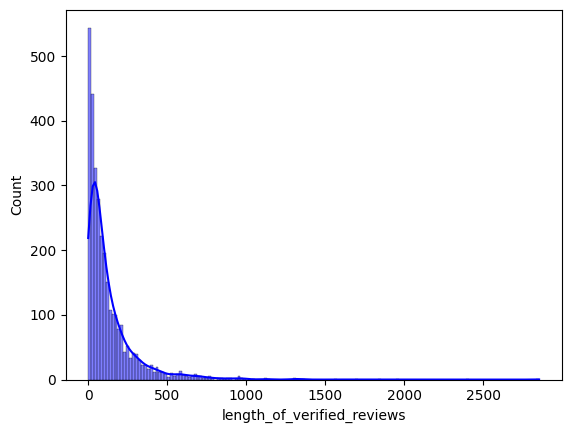

In [ ]:
#length_of_verified_reviews on full dataset

sns.histplot(df['length_of_verified_reviews'],color='blue',kde=True)

plt.show()

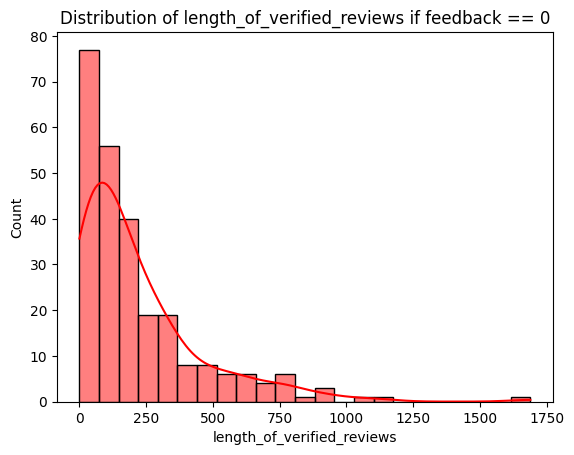

In [ ]:
#length_of_verified_reviews where data == 0

df_0 = df[df['feedback']==0]['length_of_verified_reviews']
sns.histplot(df_0,color='red',kde=True)
plt.title('Distribution of length_of_verified_reviews if feedback == 0')
plt.show()

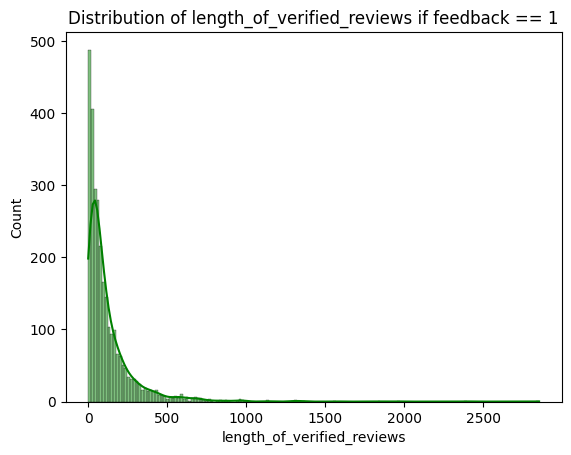

In [ ]:
#length_of_verified_reviews where data == 1

df_1 = df[df['feedback']==1]['length_of_verified_reviews']
sns.histplot(df_1,color='green',kde=True)
plt.title('Distribution of length_of_verified_reviews if feedback == 1')
plt.show()

length_of_verified_reviews mean rating

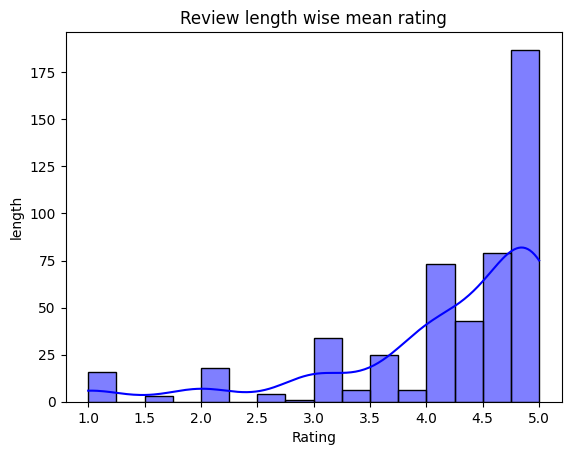

In [ ]:
mean_length = df.groupby(by='length_of_verified_reviews')['rating'].mean().sort_values()
sns.histplot(mean_length,color='blue',kde='True')
plt.title('Review length wise mean rating')
plt.xlabel('Rating')
plt.ylabel('length')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

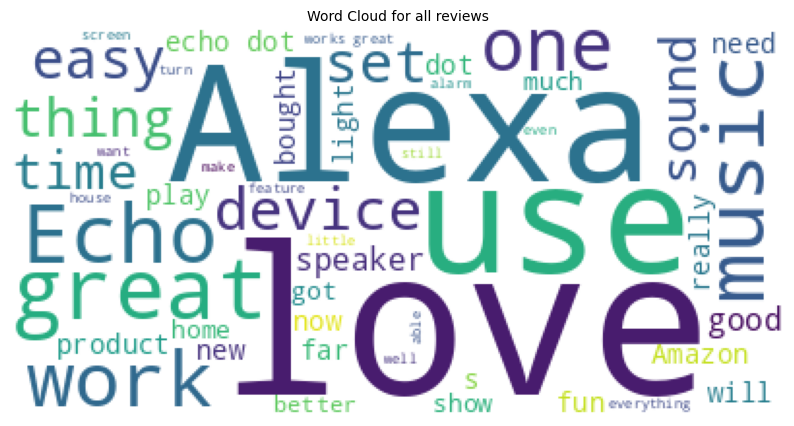

In [ ]:
#combineing all reviews

reviews = ''.join([i for i in df['verified_reviews']])

#initialising wordcloud object

wc = WordCloud(background_color='white',max_words=50)

#generating a wordcloud plot

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Word Cloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
#plotting wordcloud for positive words and negative words

neg_reviews = ' '.join([i for i in df[df['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = ' '.join([i for i in df[df['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#finding the words from reviews which are present in that feedback category only

unique_negative = [i for i in neg_reviews if i not in pos_reviews]
unique_negative = ' '.join(unique_negative)

unique_positive = [i for i in pos_reviews if i not in neg_reviews]
unique_positive = ' '.join(unique_positive)

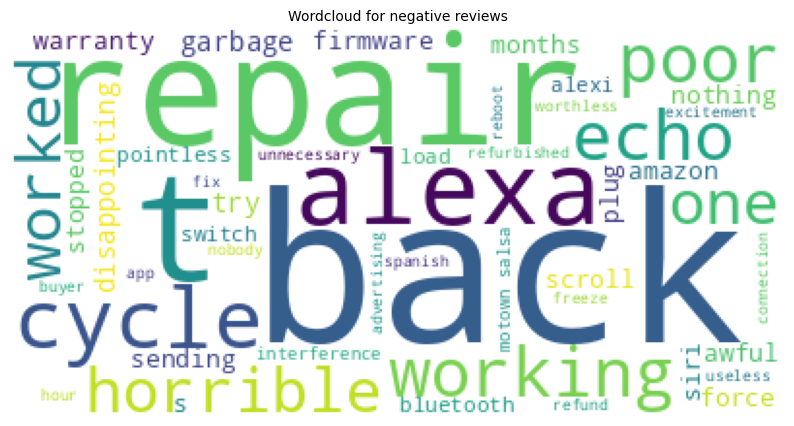

In [ ]:
wc = WordCloud(background_color='white',max_words=50)

# Generate and plot wordcloud

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

###### Negative Words can be seen in the above word cloud- repair,horrible,back,disappointing

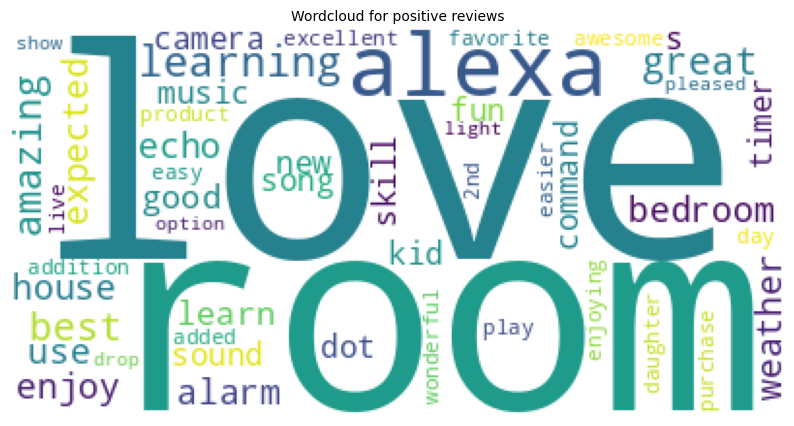

In [ ]:
wc = WordCloud(background_color='white',max_words=50)

# Generate and plot wordcloud

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

###### Positive words can be seen in the above word cloud- good,enjoying,amazing,best,love

# Preprocessing and Modelling

#### To build the corpus from the 'verified_reviews' we perform the following

1. Replace any non-alphabetical character with space
2. Convert into lower case and split into words
3. Iterating over the individual words and if it is not a stopword then adding the stemmed form of the word to the corpus

In [ ]:
from nltk.stem import PorterStemmer
import re

In [ ]:
corpus = []
stemmer = PorterStemmer()

for i in range(0,df.shape[0]):
  review = re.sub('[^a-zA-z]',' ',df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker t wait see',
 'without cellphon use mani featur ipad see use great alarm u almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one ve purchas m work get one everi room hous realli featur offer specifili play music echo control light throughout hous',
 'look great',
 'love ve listen song haven t heard childhood news weather inform s great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far s easi use understand make laugh time',
 'purchas mother knee problem now give someth tri come get around fast enjoy littl big thing alexa play song tim

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

#### Using count vectorizer to create Bag_of_Words

In [ ]:
cv = CountVectorizer(max_features = 2500)

#storing independent and dependent variables X and y

X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [ ]:
import os
os.makedirs('Models',exist_ok=True)

In [ ]:
# saving the count vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl','wb'))
print(os.listdir('Models'))

['countVectorizer.pkl']


In [ ]:
#checking the shape of X and y

print(f"X Shape: {X.shape}")
print(f"y shape: {y.shape}")

X Shape: (3149, 2500)
y shape: (3149,)


## Splitting data into train and test set with 30% data with testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)


print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


### we will scale X_train and X_test so that all values are betwenn 0 - 1

In [ ]:
scalar = MinMaxScaler()

X_train_scal = scalar.fit_transform(X_train)
X_test_scal = scalar.fit_transform(X_test)

### As the data is highly imabalnced using the SMOTE analysis

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scal,y_train)

In [ ]:
#saving the scalar model

pickle.dump(scalar,open('Models/scalar.pkl','wb'))

### Random Forest

In [ ]:
# Fitting scaled X_train and y_train on Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy: ', model_rf.score(X_train_resampled,y_train_resampled))
print('Testing Accuracy: ', model_rf.score(X_test_scal,y_test))


Training Accuracy:  0.9844521224086871
Testing Accuracy:  0.9195767195767196


In [ ]:
# predicting on the test set

y_pred_rf = model_rf.predict(X_test_scal)

In [ ]:
# Confusion Matrix

cm_rf = confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[ 41  37]
 [ 39 828]]


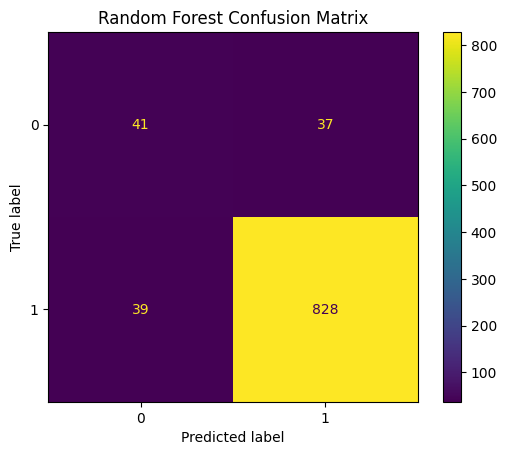

In [ ]:
cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=model_rf.classes_)
cm_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

### k fold cross-validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_resampled,y = y_train_resampled,cv = 10)
print('Accuracy: ',accuracies.mean())
print('Standard Variance: ',accuracies.std())

Accuracy:  0.957092379736058
Standard Variance:  0.051876016615177226


#### Applying GridSearch to get the optimal parameters on RandomForest

In [ ]:
params = {
    'bootstrap' : [True],
    'max_depth' : [80,100],
    'min_samples_split':[8,12],
    'n_estimators': [100,30]
}

In [ ]:
cv_object = StratifiedKFold(n_splits=2)

grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=params,
                           cv=cv_object,
                           verbose=0,
                           return_train_score=True)

grid_search.fit(X_train_resampled,y_train_resampled.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 30]},
             return_train_score=True)

In [ ]:
# Feting the best_params_ from the gridsearchcv

print(f"Best Parameter combination: {grid_search.best_params_}")

Best Parameter combination: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
print(f"Cross validation mean accuracy on train set: {grid_search.cv_results_['mean_train_score'].mean()*100}")
print(f"Cross validation mean accuracy on test set: {grid_search.cv_results_['mean_test_score'].mean()*100}")
print('*****************************')
print(f"Accuracy score for test set: {accuracy_score(y_test,y_pred_rf)}")
print(f"Precision score for test set: {precision_score(y_test,y_pred_rf)}")
print(f"Recall score for test set: {recall_score(y_test,y_pred_rf)}")
print(f"F1_score score for test set: {f1_score(y_test,y_pred_rf)}")


Cross validation mean accuracy on train set: 97.47655478775914
Cross validation mean accuracy on test set: 93.8764807502468
*****************************
Accuracy score for test set: 0.9195767195767196
Precision score for test set: 0.9572254335260115
Recall score for test set: 0.9550173010380623
F1_score score for test set: 0.9561200923787528


####XG Boost

In [ ]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy: ',model_xgb.score(X_train_resampled,y_train_resampled))
print('Testing Accuracy: ',model_xgb.score(X_test_scal,y_test))

Training Accuracy:  0.9639684106614018
Testing Accuracy:  0.9068783068783068


In [ ]:
y_pred_xgb = model_xgb.predict(X_test_scal)

In [ ]:
# Confusion Matrix

cm_xgb = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb)

[[ 47  31]
 [ 57 810]]


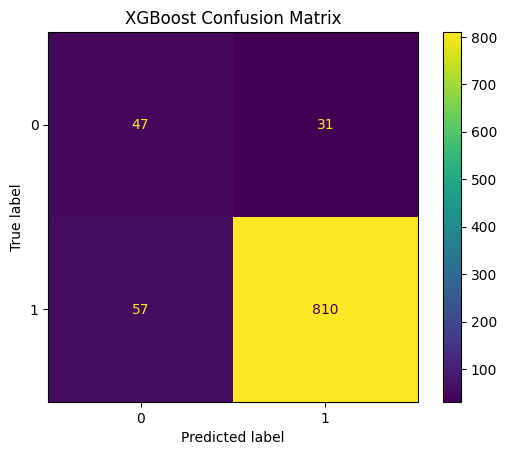

In [ ]:
cm_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=model_xgb.classes_)
cm_xgb.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
print(f"Accuracy score for test set: {accuracy_score(y_test,y_pred_xgb)}")
print(f"Precision score for test set: {precision_score(y_test,y_pred_xgb)}")
print(f"Recall score for test set: {recall_score(y_test,y_pred_xgb)}")
print(f"F1_score score for test set: {f1_score(y_test,y_pred_xgb)}")


Accuracy score for test set: 0.9068783068783068
Precision score for test set: 0.9631391200951248
Recall score for test set: 0.9342560553633218
F1_score score for test set: 0.9484777517564402


In [ ]:
# Saving the RandomForest Classifier

pickle.dump(model_rf,open('Models/model_rf.pkl','wb'))

In [ ]:
#saved by mistakenly the XGBoost model deleting the same and using the Random Forest model

# incorrect_file_path = 'Models/model_xgb.pkl'

# if os.path.exists(incorrect_file_path):
#   os.remove(incorrect_file_path)
#   print(f"Deleted file: {incorrect_file_path}")

# else:
#   print(f"File not found in the path")

## Decsion Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Accuracy of the model Decision Tree Classified

print(f"Training Accuracy: {model_dt.score(X_train_resampled,y_train_resampled)}")
print(f"Testing Accuracy: {model_dt.score(X_test_scal,y_test)}")

Training Accuracy: 0.9844521224086871
Testing Accuracy: 0.8761904761904762


In [ ]:
y_pred_dt = model_dt.predict(X_test_scal)

In [ ]:
# confusion matrix for decision trees

cm_dt = confusion_matrix(y_test,y_pred_dt)
print(cm_dt)

[[ 48  30]
 [ 87 780]]


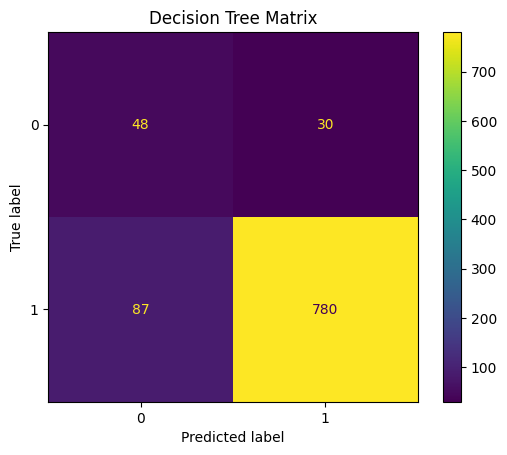

In [ ]:
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=model_dt.classes_)
cm_dt_display.plot()
plt.title("Decision Tree Matrix")
plt.show()

In [ ]:
print(f"Accuracy score for test set: {accuracy_score(y_test,y_pred_dt)}")
print(f"Precision score for test set: {precision_score(y_test,y_pred_dt)}")
print(f"Recall score for test set: {recall_score(y_test,y_pred_dt)}")
print(f"F1_score score for test set: {f1_score(y_test,y_pred_dt)}")


Accuracy score for test set: 0.8761904761904762
Precision score for test set: 0.9629629629629629
Recall score for test set: 0.8996539792387543
F1_score score for test set: 0.9302325581395349


In [ ]:
#loading the saved model

loaded_model = pickle.load(open('Models/model_rf.pkl','rb'))

In [ ]:
input_1 = ['not liked the design but loved the quality of the quality of the model']

input_1_vectors = cv.transform(input_1)

loaded_model.predict(input_1_vectors)


array([1])

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]


In [ ]:
import numpy as np
print(np.__version__)

1.26.4


In [ ]:
print(pd.__version__)

2.1.4
